# Formative Assessment ( Data Preprocessing )

# Data Processing before building machine learning Model
----------------------------------------------------------------------------------

Steps of Preprocessing of data
--------------------------------------------

Step 1] - Import necessary libararies .
Step 2] - Read Data Set .
Step 3] - Sanity Check of Data
Step 4] - Exploratory Data Analysis [EDA]
Step 5] - Missing Value Treatments
Step 6] - Outliers Treatments.
Step 7] - Duplicates and Garbage Value treatment.
Step 8] - Normalization 
Step 9] - Encoding of Data  

# Step 1: Import Necessary Library

In [118]:
# Standard library imports
import warnings # For warning handling

# Third-party imports
import pandas as pd # for data manipulation and analysis, CSV file I/O
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical graphics
from sklearn.model_selection import train_test_split # For data splitting (Training & Testing) in machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler # For feature standardization & Normalization
from sklearn.metrics import accuracy_score, classification_report # For model evaluation

# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings


# Step 2: Read DataSet

In [119]:
df=pd.read_csv("C:\\Users\\rajan\\Downloads\\Employee.csv")

In [120]:
#head
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [122]:
#tail
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


# Step 3: Sanity Check of Data

In [123]:
#Shape
# Show the shape of the dataset
print("The shape =", df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")



The shape = (148, 6)
Number of Rows: 148
Number of Columns: 6
Number of Features: 5
Number of All Data: 888


In [16]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [124]:
# Descriptive Statistics of Numeric Variables only.
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,130.0,30.48,11.10,0.0,22.0,32.5,37.75,54.0
Salary,124.0,5312.47,2573.76,1089.0,3030.0,5000.0,8000.00,9876.0
Gender,148.0,0.22,0.42,0.0,0.0,0.0,0.00,1.0


In [125]:
# Descriptive analysis of Categorical Variables only.
df.describe(include=object)

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [128]:
#Finding Missing Values
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [129]:
#For Finding The Percentage of Missing Value
df.isnull().sum()/df.shape[0]*100

Company     5.405405
Age        12.162162
Salary     16.216216
Place       9.459459
Country     0.000000
Gender      0.000000
dtype: float64

In [127]:
#Finding Duplicates 
df.duplicated().sum()

4

In [11]:
#Identifying Garbage Value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64
*********************************************
Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64
*********************************************
Country
India    148
Name: count, dtype: int64
*********************************************


In [130]:
#No garbage values

# Step 4- Exploratory Data Analysis

 - Data Visualization
 - Data Cleaning
 - Data Preprocessing

- Data Visualization
    - Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis


# Graphical Analysis

Gender
0    115
1     33
Name: count, dtype: int64


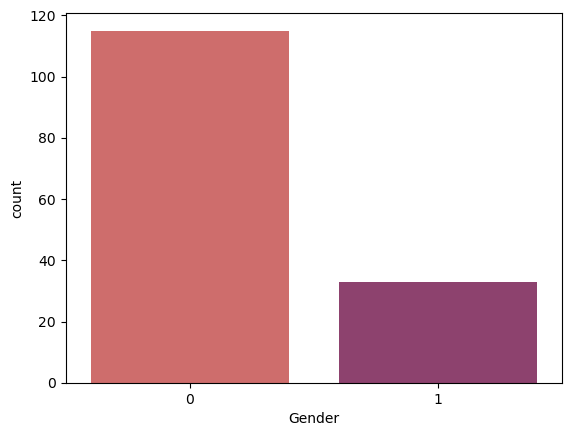

In [131]:
# "dropna" as False to count NaN (Not-a-Number) values
GenderAnalysis = df.Gender.value_counts(dropna=False)
print(GenderAnalysis)

# Bar Charts Analysis "For Gender feature"
sns.countplot(x="Gender", data=df, palette="flare")
plt.show()

Age
NaN     18
22.0    16
33.0    13
44.0    10
21.0     8
23.0     8
34.0     8
32.0     7
35.0     6
0.0      6
41.0     5
43.0     4
24.0     4
45.0     4
31.0     3
25.0     3
20.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64


TypeError: object of type 'numpy.float32' has no len()

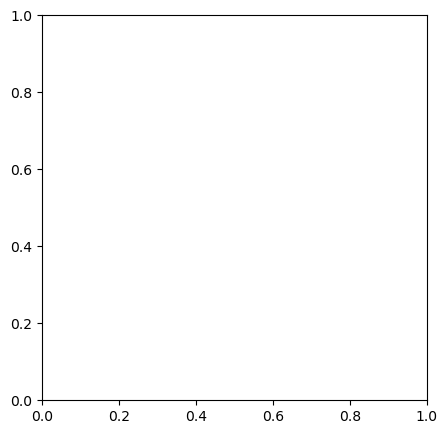

In [33]:
# "dropna" as False to count NaN values
Age_Analysis = df.Age.value_counts(dropna=False)
print(Age_Analysis)

# Create a pie chart "For Married feature"
plt.figure(figsize=(10, 5)) # figure in inches

# labels by descending order
plt.pie(df['Age'].count(), 
        #labels=[("Married"),("Single"),("NaN")], 
        startangle=216, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("flare", 
        #len(Place_Analysis)
        ))

plt.axis('equal')  # Used to set the aspect ratio of the plot to be equal.
plt.title('Marital Status Distribution')
plt.show()

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
NaN           14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


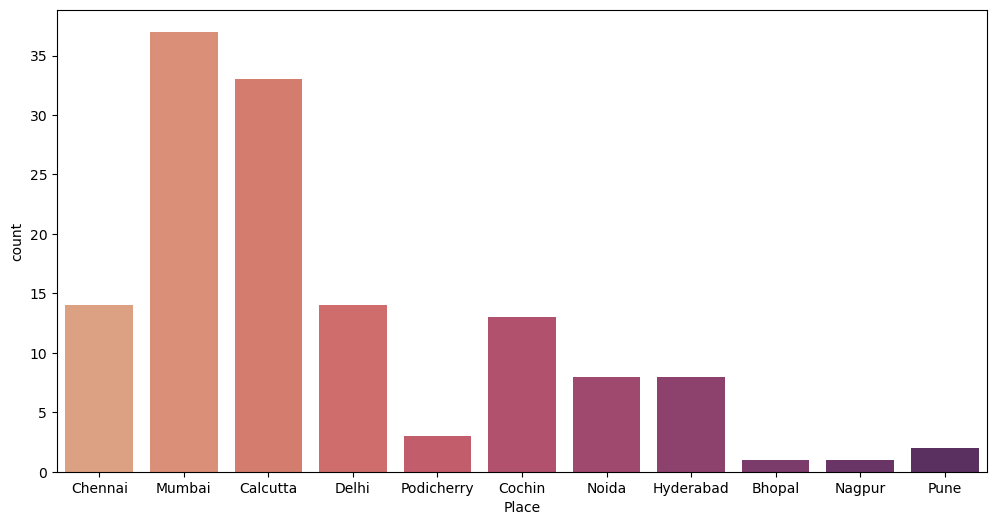

In [38]:
# "dropna" as False to count NaN values
PlaceAnalysis = df.Place.value_counts(dropna=False)
print(PlaceAnalysis)

plt.figure(figsize=(12, 6))  # Width, Height in inches

# Bar Charts Analysis "For place feature"
sns.countplot(x="Place", data=df, palette="flare")
plt.show()

Company
TCS                          53
Infosys                      45
CTS                          36
NaN                           8
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64


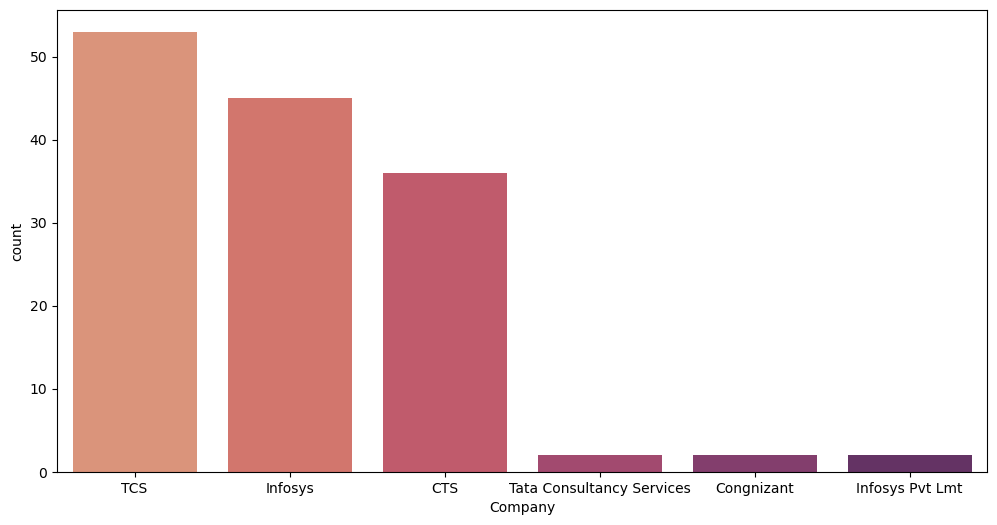

In [132]:
# "dropna" as False to count NaN values
CompanyAnalysis = df.Company.value_counts(dropna=False)
print(CompanyAnalysis)
plt.figure(figsize=(12, 6))  # Width, Height in inches

# Bar Charts Analysis "For Company feature"
sns.countplot(x="Company", data=df, palette="flare")
plt.show()

Salary
NaN       24
3000.0     9
5000.0     6
4034.0     5
5034.0     5
8202.0     5
7084.0     4
5835.0     4
8787.0     4
2934.0     4
2034.0     4
2300.0     4
9284.0     4
8345.0     4
8943.0     4
3184.0     4
4824.0     4
9024.0     4
3045.0     4
1234.0     4
1089.0     4
8000.0     3
3030.0     3
6000.0     3
9000.0     3
7000.0     3
3234.0     2
9876.0     2
7654.0     2
4000.0     2
4345.0     1
6544.0     1
6543.0     1
4324.0     1
5435.0     1
5555.0     1
3454.0     1
5654.0     1
5009.0     1
5098.0     1
3033.0     1
Name: count, dtype: int64


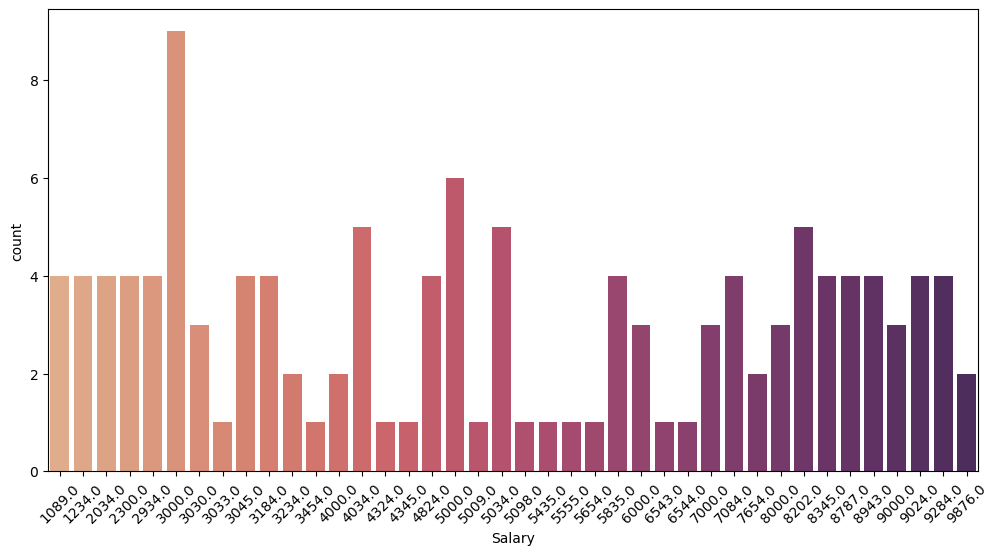

In [43]:
# "dropna" as False to count NaN values
SalaryAnalysis = df.Salary.value_counts(dropna=False)
print(SalaryAnalysis)
plt.figure(figsize=(12, 6))  # Width, Height in inches

# Bar Charts Analysis "For Company feature"
sns.countplot(x="Salary", data=df, palette="flare")
plt.xticks(rotation=45)

plt.show()

In [12]:

#Descriptive Statistics
df.describe()  #Numerical Column


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [44]:
df.describe(include="object")

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


The Average Salary: 5312.47 
The ratio of people with income above average to below average: 77.14 
Number of people income above the average: 54
Number of people income below the average: 70


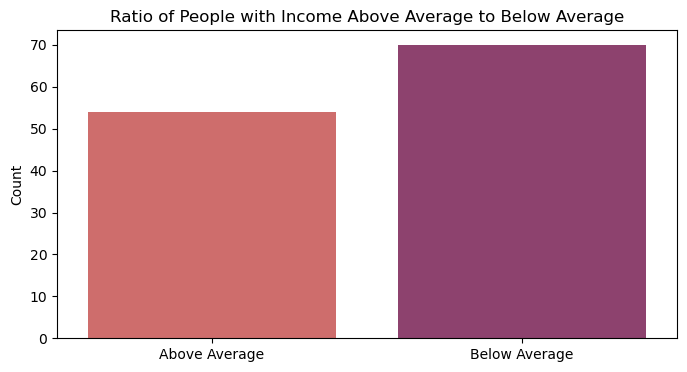

In [133]:
# Calculate the average income
average_Salary = df['Salary'].mean()
print(f"The Average Salary: {average_Salary:.2f} ")

# Count incomes higher and lower than average
above_average_count = (df['Salary'] > average_Salary).sum()
below_average_count = (df['Salary'] <= average_Salary).sum()

# Calculate ratio and print the results
ratio = above_average_count / below_average_count
print(f"The ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

# Plot the ratio using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()

Number of below average employees are greater than above average employees

In [134]:
# Histogram distribution for numerical values "This enables us to see if there are outliers or not"

# Set the seaborn theme palette
sns.set_theme(palette="flare")

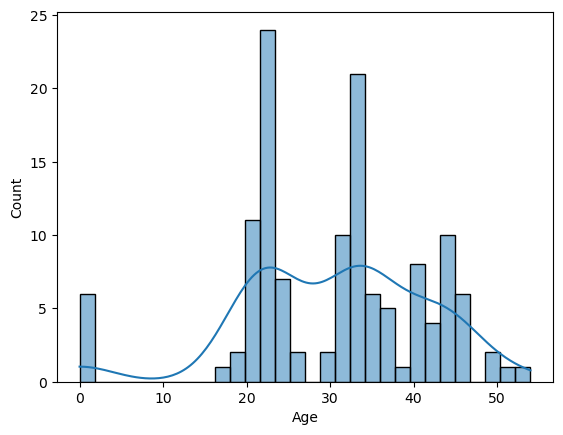

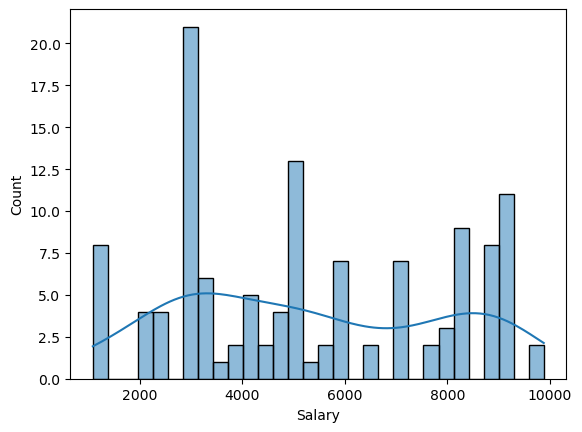

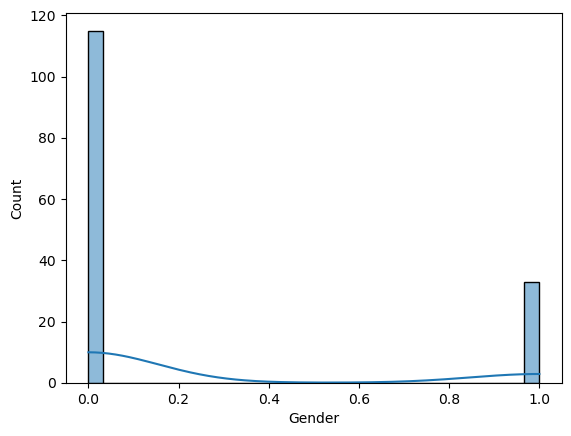

In [48]:
#Histogram to understand the distribution 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()

Anyone of these curves are not in bellshaped.

# - Correlation Analysis
- Data Relationships Analysis

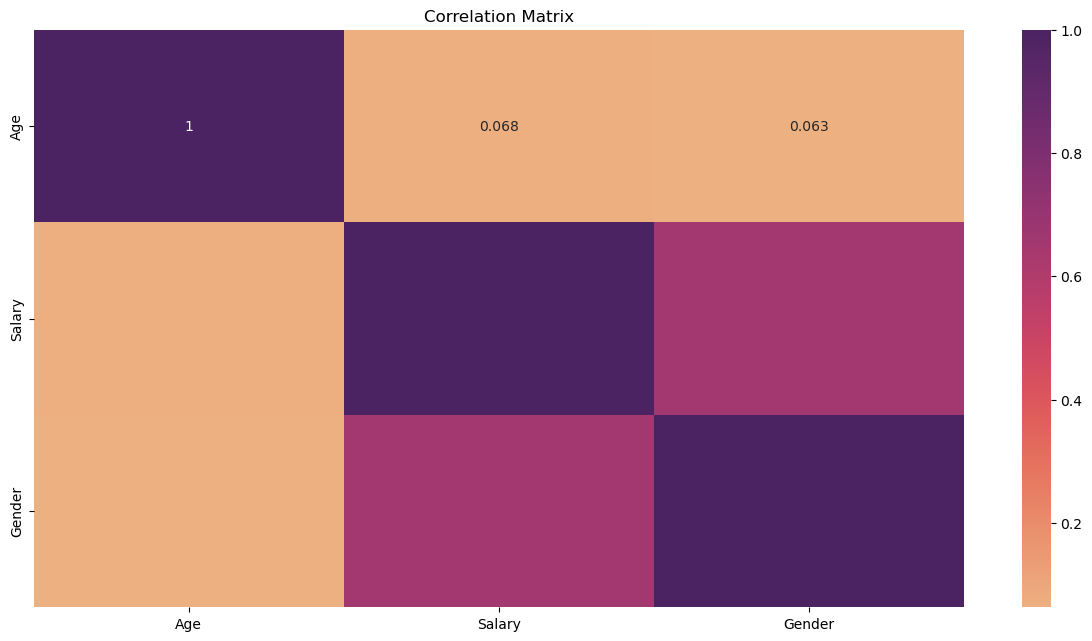

In [49]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

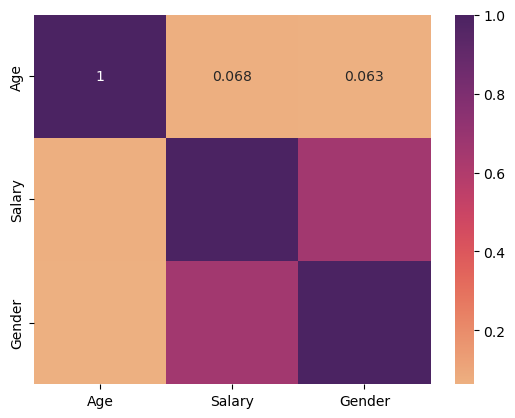

In [51]:
correlation_matrix = .corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='flare')
plt.show()


 There is positive correlation between **Salary** and **Age**

3.Data Relationships Analysis

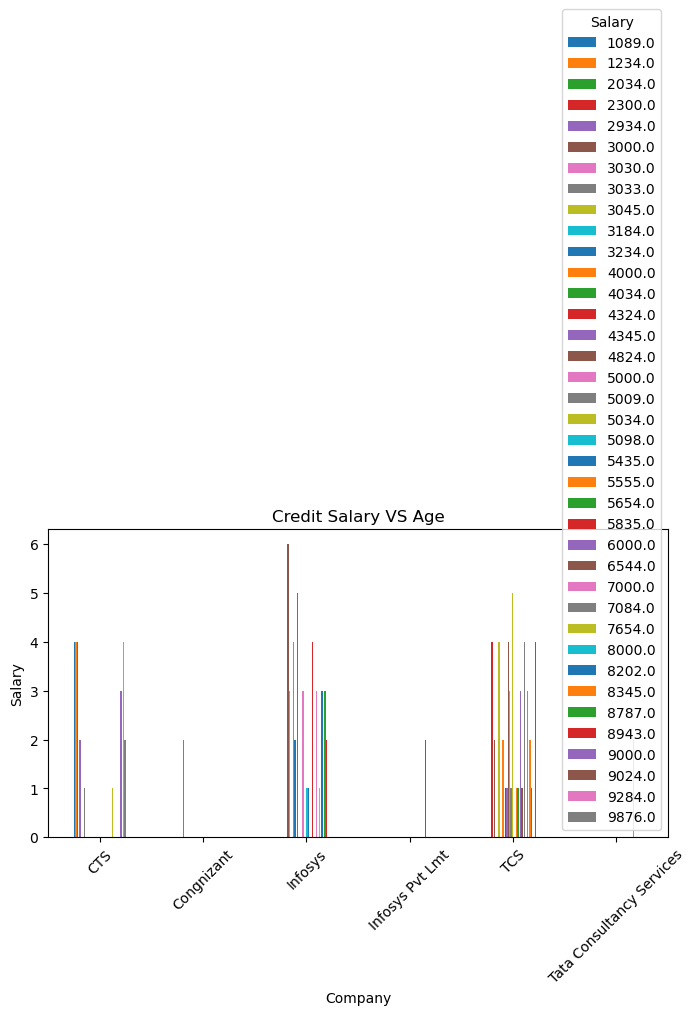

In [59]:
# Create a cross-tabulation of 'Salary' and 'Company' variables
pd.crosstab(df.Company, df.Salary).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Credit Salary VS Age')

# Label the x-axis
plt.xlabel('Company')

# Label the y-axis
plt.ylabel('Salary')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Display the plot
plt.show()

Infosis giving highest salary

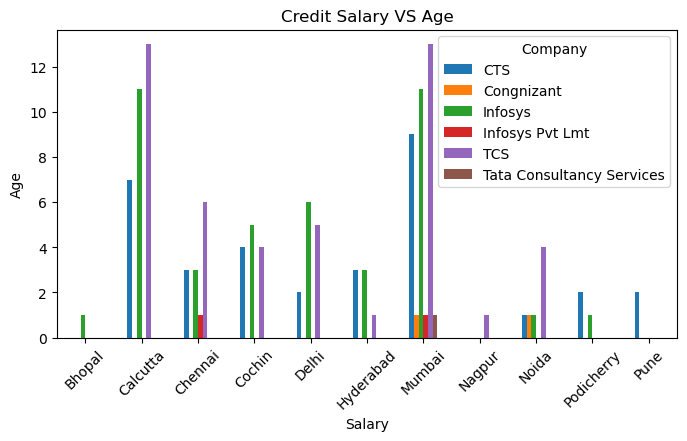

In [60]:
# Create a cross-tabulation of 'Place' and 'Company' variables
pd.crosstab(df.Place, df.Company).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Credit Salary VS Age')

# Label the x-axis
plt.xlabel('Salary')

# Label the y-axis
plt.ylabel('Age')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Data Cleaning
Data cleaning refers to the process of **identifying**, **correcting**, and **removing errors**, **inconsistencies**, and **inaccuracies** from a dataset. It involves transforming raw data into a clean and structured format that is suitable for analysis, modeling, and other data-related tasks, including:
- Remove Unneeded Features
- Handling Missing Values
- Encoding Categorical Variables
- Handling Outliers
- Handling Duplicates

# 1. Remove Unneeded Features
As IDies are completely unique and not correlated with any of the other column, So we will drop it using .drop() function. But here is no id for this data.
- axis = 1 means column , axis = 0 means row.
- inplace = True means the changes are reflected in the original DataFrame, inplace = False (default) means leaving the original DataFrame unchanged.

# 2. Handling Missing Values

**Missing values** are data points that are absent or not recorded for certain variables in a dataset. This can happen because of mistakes such as data entry errors, equipment failures, or simply because the information is not available.

 **How to detect missing values?**
 - Look for blank cells and use data analysis tools that can identify missing values like .isnull() functoin.

 **Decision options:**
1. Keep them 
    - Not ideal, as missing values can lead to biased analyses and inaccurate predictions.
2. Reassign new values to them (Using specific techniques)
    - Imputation (Y):
        - Replace missing values with estimated or calculated values based on the available data. This can be done using various methods such as:
            1. **Mean/Median Imputation:** Replace with the average (mean) or middle value (median) for numerical data.
            2. **Mode Imputation:** Replace with the most frequent value.
    - Forward/Backward Fill (N):
        - For time-series data, missing values can be filled with the last observed value (forward fill) or the next observed value (backward fill).
    - Interpolation (N):
        - Estimate missing values based on the trend or pattern observed in the existing data points.
3. Delete them (Sometimes necessary, especially if missing values are extensive and cannot be reasonably imputed without introducing significant bias.)

In [74]:
# Check for missing values
null_counts = df.isnull().sum()

# Display the number of null values
print(null_counts)


Company     0
Age        18
Salary      0
Place       0
Country     0
Gender      0
Agre        0
dtype: int64


There are two types of data:</font>
- Numerical Data
- Categorical Data

In [75]:
# Fill the missing values for numerical data, .fillna = fill (NaN) values


#1- Mean Imputation:

df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
df["Age"] = df["Age"].fillna(df["Age"].mean())


#1- Median Imputation:

df["Agre"] = df["Age"].fillna(df["Age"].median())


## 2- Mode Imputatoin: for categorical data 
# The best way fill in the Company name is the mode (Most common valus)
# [0] This ensures that if there are multiple mode values, only the first one is selected.
df["Company"] = df["Company"].fillna(df["Company"].mode()[0])
## 1- Mean Imputation:
# The best way fill in the Loan Amount is the Mean (The average).
## 2- Mode Imputatoin:
# The best way fill in the Credit History is the mode (Most common valus)

############################################################################################

# Fill the missing values for categorical data.
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Place"] = df["Place"].fillna(df["Place"].mode()[0])




In [76]:
# Check for missing values after handling
null_counts = df.isnull().sum()

# Display the number of null values after handling
print(null_counts)
print("_________________________________________________________________")

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
Agre       0
dtype: int64
_________________________________________________________________


Now there is no null values in the data set.

# 3. Encoding Categorical Variables

In [151]:
# Convert categorical variables into dummy/indicator variables through a process called "one-hot" encoding
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Place", "Company"])

print(df_one_hot_encoded )

print("The shape =",df.shape)
print("_______________________________________________")


      Age  Salary Country  Gender  Place_Bhopal  Place_Calcutta  \
0    20.0     NaN   India       0         False           False   
1    30.0     NaN   India       0         False           False   
2    35.0  2300.0   India       0         False            True   
3    40.0  3000.0   India       0         False           False   
4    23.0  4000.0   India       0         False           False   
..    ...     ...     ...     ...           ...             ...   
143  33.0  9024.0   India       1         False            True   
144  22.0  8787.0   India       1         False            True   
145  44.0  4034.0   India       1         False           False   
146  33.0  5034.0   India       1         False           False   
147  22.0  8202.0   India       0         False           False   

     Place_Chennai  Place_Cochin  Place_Delhi  Place_Hyderabad  ...  \
0             True         False        False            False  ...   
1            False         False        False        

# 4. Handling Outliers

**Outliers** are data points that significantly differ from the rest of the observations in a dataset, often due to errors in data collection or genuine extreme values.

 **How to detect outliers?**
- Visualization data (Numerical values)

 **Decision options:**
1. Keep them (Not the best solution, I try it and not get high accuracy, "There is better")
2. Reassign new values to them (Using specific techniques)
    - Capping Outliers (N)
        - Instead of removing outliers entirely, replace extreme values with more reasonable thresholds.
    - Robust Scaling (Y)
        - Use scaling methods less sensitive to outliers (e.g., IQR scaling, standardization with robust estimators).
            - Robust Scaling Function
            - IQR scaling
    - Replace with mean (N)
        - Replacing the outliers with the mean value
3. Delete them (N)

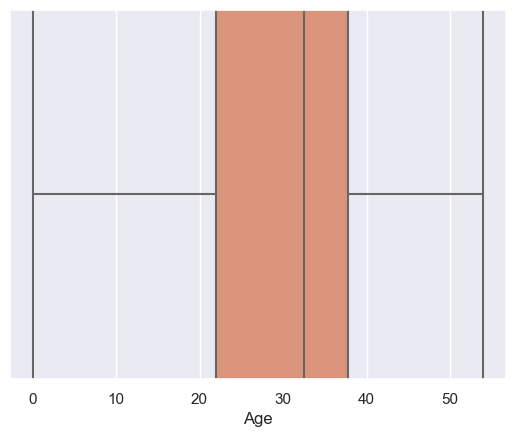

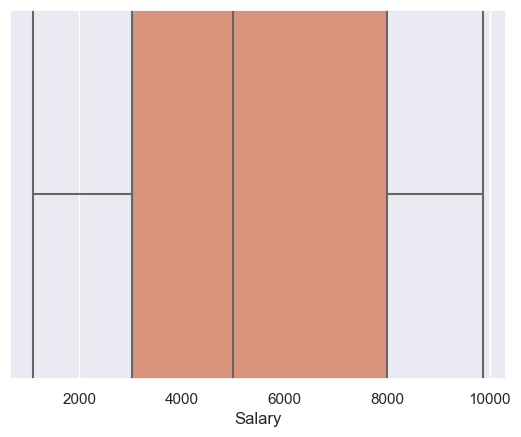

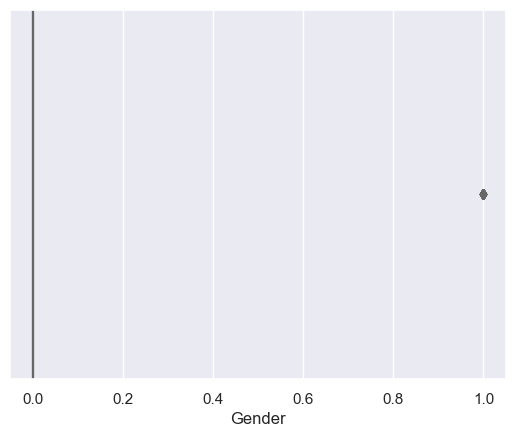

In [147]:
#Boxplot to understand the ouliers 
# Visualization data numerical values
import warnings as wr
wr.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i,width=1000)
  plt.show()

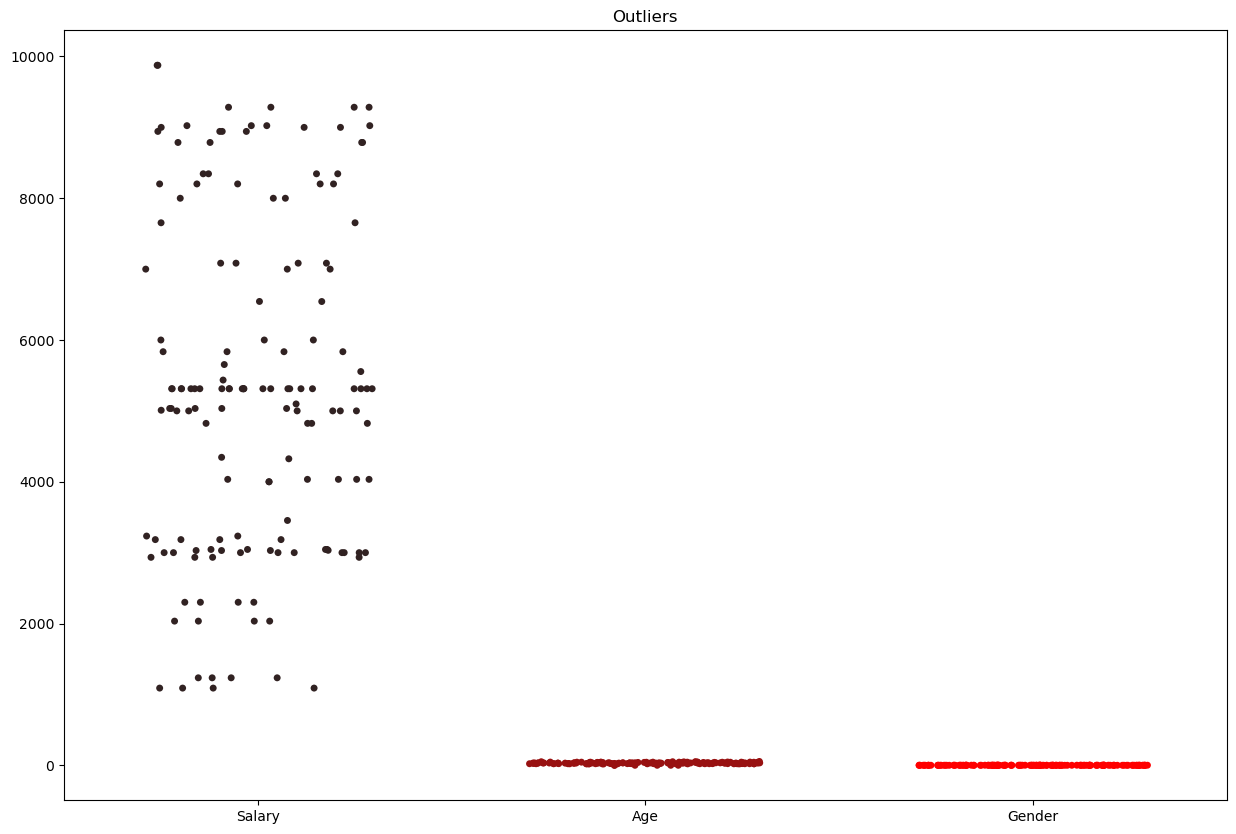

In [86]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = df.get(["Salary", "Age", "Gender"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

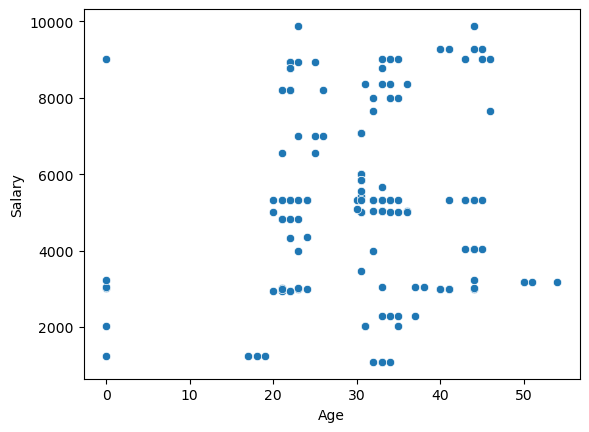

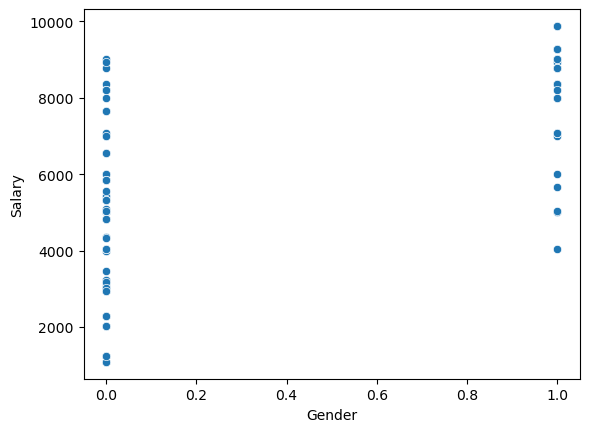

In [88]:
#Scatter Plot to understand the relationships
for i in ['Age', 'Gender']:
   sns.scatterplot(data=df,x=i,y='Salary')
   plt.show()

In [89]:
df.select_dtypes(include="number").columns

Index(['Age', 'Salary', 'Gender', 'Agre'], dtype='object')

In [90]:
#Correlation with heat map to interpret the relation
s=df.select_dtypes(include='number').corr()

<Axes: >

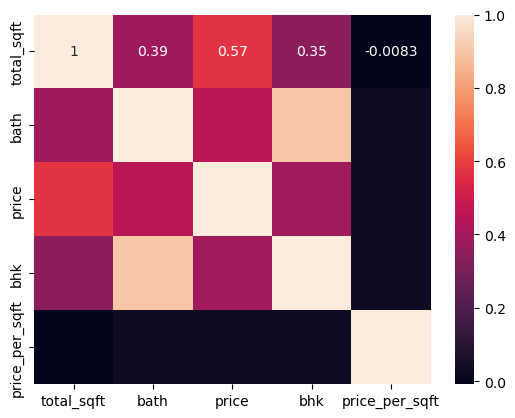

In [89]:
#plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

# Step : 6- Outliers treatment

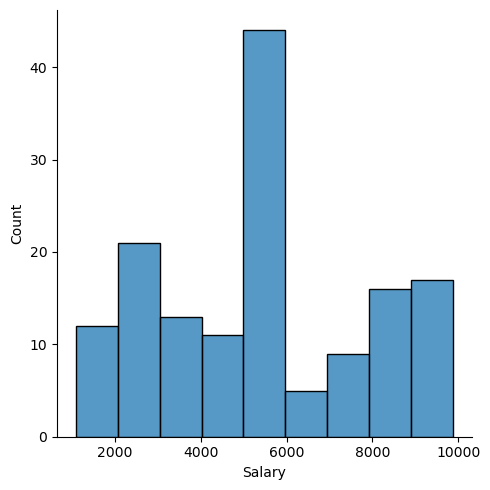

In [92]:
sns.displot(df['Salary'])

<Axes: >

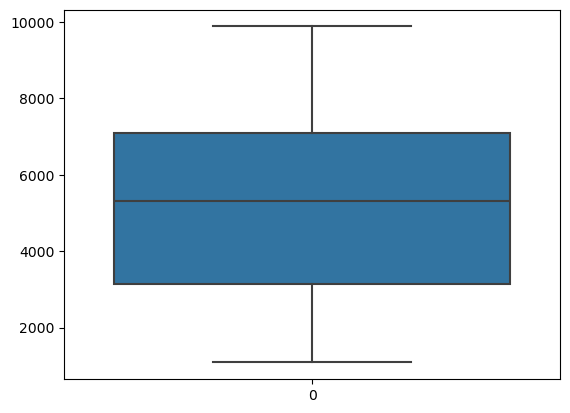

In [95]:
sns.boxplot(df['Salary'])

# No major outliers detected 
No need of outlier handling

In [ ]:
#IQR Methode, Percentile

In [96]:
#Decide whether to do outlier treatment or not , if do how?
# Doing outlier treatment for continues columns. Price and squarefeet

def whisker(col):
   q1,q3=np.percentile(col,[5,95])
   iqr=q3-q1
   lw=q1-1.5*iqr
   uw=q3+1.5*iqr
   return lw,uw,iqr

In [97]:
whisker(df['Age'])

(-21.624999999999993, 84.975, 26.65)

In [98]:
for i in('Salary','Age','Gender'):
    lw,uw,iq=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]<uw,uw,df[i])
    print(lw,uw,iq)

-9751.0 20289.0 7510.0
-21.624999999999993 84.975 26.65
-1.5 2.5 1.0


In [99]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender', 'Agre'], dtype='object')

# Z-Score Methode

In [107]:
#Find the limits
upper_limit=df['Age'].mean()+3*df['Age'].std()
lower_limit=df['Age'].mean()-3*df['Age'].std()
print("upper_limit:",upper_limit, "\nlower_limit",lower_limit)


upper_limit: 84.9750000000007 
lower_limit 84.97499999999934


In [103]:
# Find the outliers
df.loc[(df['Salary']>upper_limit) | (df['Salary']<lower_limit)]

,Company,Age,Salary,Place,Country,Gender,Agre


In [136]:
#trimming

new_def= df.loc[(df['Salary']<upper_limit) | (df['Salary']>lower_limit)]
print("Old Data:",len(df))
print("New Data:",len(new_def))

Old Data: 148
New Data: 124


<Axes: >

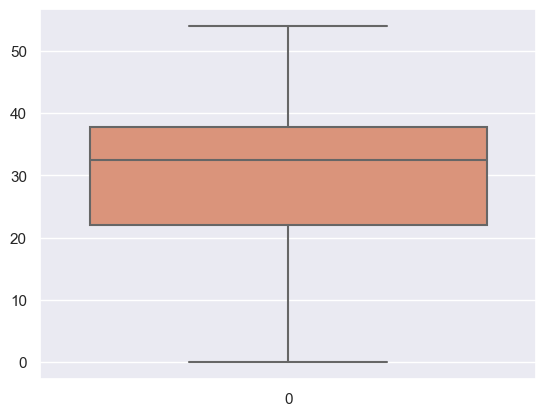

In [137]:
sns.boxplot(df['Age'])

In [138]:
#Capping -Change the outlier values to upper (or) lower limit values
new_def=df.copy()
new_def.loc[new_def['Salary']>upper_limit,'Salary']=upper_limit
new_def.loc[new_def['Salary']>lower_limit,'Salary']=lower_limit

<Axes: >

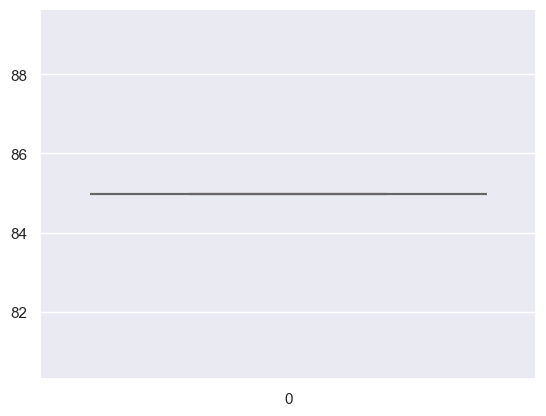

In [139]:
sns.boxplot(new_def['Salary'])

<Axes: >

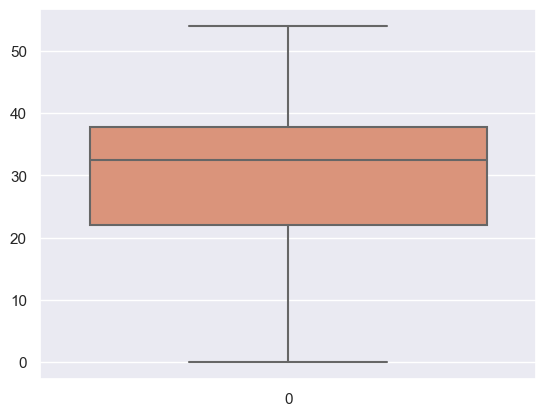

In [141]:
#Capping -Change the outlier values to upper (or) lower limit values
new_def=df.copy()
new_def.loc[new_def['Age']>upper_limit,'Age']=upper_limit
new_def.loc[new_def['Age']>lower_limit,'Age']=lower_limit

sns.boxplot(new_def['Age'])

# Data Preprocessing 
It involves *preparing* and *transforming raw data* into a suitable format for analysis and **model training**. Effective data processing ensures that the machine learning algorithms can extract meaningful patterns and make accurate predictions, includes:
- Splitting data into "Features" - "Target"
- SMOTE Technique
- Data Re-scaling and Normalizing the features
- Splitting data into "Training" - "Testing" Data

In [ ]:
#1. Splitting data into "Features" - "Target"

In [142]:
# Features "Inputs" (X)
X = df.drop(columns=['Salary'])

# Target variable "Outputs" (Y)
Y = df['Age']

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (148, 5)
Shape of Y: (148,)


#2.SMOTE Technique
There is no adequate data in this dataset to do this technique

#3# Rescale and normalize the features
'''
 Standardization (Normalization)
#I will choose one of them in the future part "model selection" based on the highest accuracy

In [145]:
'''standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

Min-Max_Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
'''


'standard_scaler = StandardScaler()\nX = standard_scaler.fit_transform(X)\n\nMin-Max_Scaling (Rescaling)\nmin_max_scaler = MinMaxScaler()\nX = min_max_scaler.fit_transform(X)\n'

4. Splitting data into "Training" - "Testing" 

In [117]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (118, 6)
Shape of X_test: (30, 6)
Shape of Y_train: (118,)
Shape of Y_test: (30,)


In [148]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_df)

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


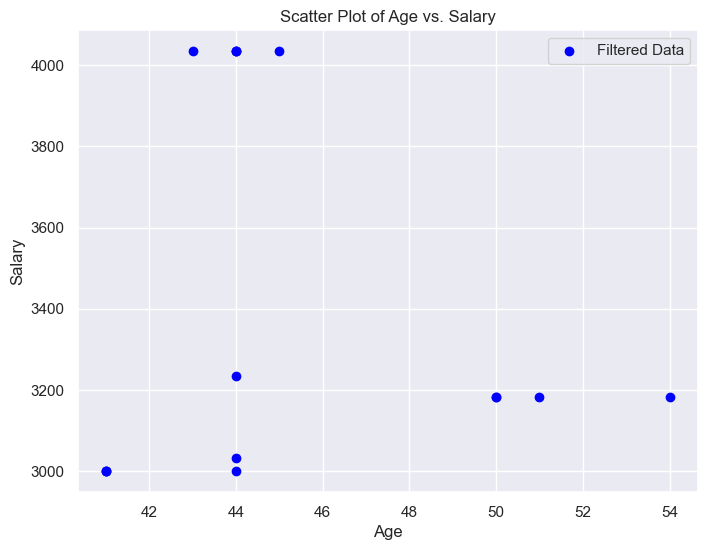

In [149]:
# Plot Age vs. Salary
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'], c='blue', label='Filtered Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Age vs. Salary')
plt.legend()
plt.grid(True)
plt.show()



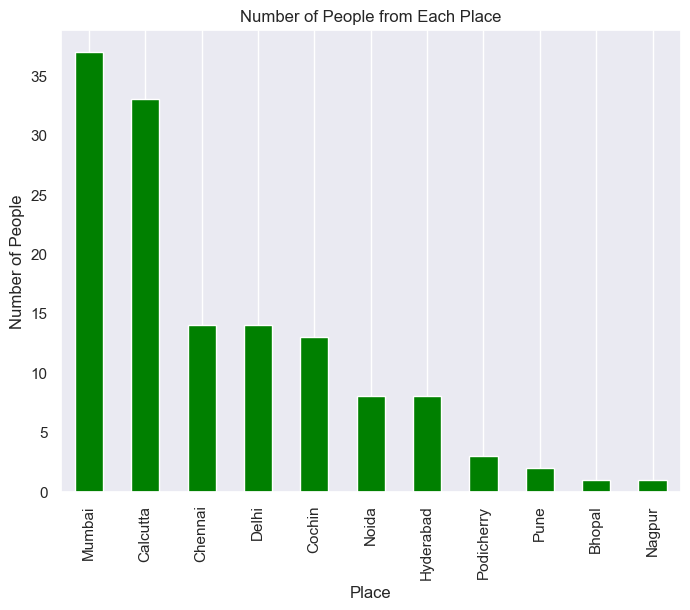

In [150]:
# Count the number of people from each place
place_counts = df['Place'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
place_counts.plot(kind='bar', color='green')
plt.xlabel('Place')
plt.ylabel('Number of People')
plt.title('Number of People from Each Place')
plt.grid(axis='y')
plt.show()

In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the 'Color' column
df['Color_encoded'] = label_encoder.fit_transform(df['Color'])

print(df)
Output:

Color

In [152]:

# Remove duplicates in-place
df.drop_duplicates(inplace=True)

print("\nOriginal DataFrame After In-Place Removal of Duplicates:")
print(df)


Original DataFrame After In-Place Removal of Duplicates:
             Company   Age  Salary     Place Country  Gender
0                TCS  20.0     NaN   Chennai   India       0
1            Infosys  30.0     NaN    Mumbai   India       0
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[144 rows x 6 columns]
